In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from ete3 import Tree
import random, os, time
from ete3 import NCBITaxa
import unicodedata
from matplotlib.pyplot import figure
import operator

In [2]:
%config Completer.use_jedi = False

In [4]:
data=pd.read_excel('../Plastic database_Final_Ankita.xlsx')

In [5]:
df=pd.DataFrame(data)

In [6]:
df.shape

(1687, 16)

In [7]:
df_org=df[['doi','Microorganism_abb','Plastic_abb.']].drop_duplicates()

In [8]:
df_org.shape

(1527, 3)

In [9]:
ncbi = NCBITaxa()

In [10]:
micro={}
count=0
for index,row in df_org.iterrows():
    if len(ncbi.get_name_translator([row['Microorganism_abb']]).items())==1:
        micro.update({list(ncbi.get_name_translator([row['Microorganism_abb']]).items())[0][0]:list(ncbi.get_name_translator([row['Microorganism_abb']]).items())[0][1][0]})
        count+=1 

In [11]:
count

1494

## add taxa id to dataframe 

In [12]:
taxa=[]
for index,row in df_org.iterrows():
    try:
        taxa.append(micro[row['Microorganism_abb']])
    except:
        taxa.append(row['Microorganism_abb'])

In [13]:
df_org['taxa']=taxa

In [14]:
df_org=df_org.loc[~(df_org['taxa']=='-')]

In [15]:
df_org=df_org.loc[~(df['Microorganism_abb']=='Uncultured bacterium')]

In [16]:
df_org=df_org.loc[~(df['Microorganism_abb']=='uncultured fungus')]

In [17]:
df_org=df_org.loc[~(df['Microorganism_abb']=='Gut Microbiome')]

In [18]:
df_org.shape

(1477, 4)

In [19]:
count=[]
for taxa in df_org['taxa']:
    #print(taxa)
    kingdom=[]
    try:
        for key,value in ncbi.get_rank(ncbi.get_lineage(taxa)).items():
            if value=='superkingdom':
                kingdom.append(key)
    except:
        print(taxa)
    kingdom.append(taxa)
    count.append(kingdom)

In [20]:
set([i[0] for i in count])

{2, 2759}

## kingdom Bacteria

In [21]:
bac_taxa=list(set([i[1] for i in count if i[0]==2]))

In [22]:
df_org_bac=df_org.loc[df_org['taxa'].isin(bac_taxa)]

In [23]:
df_org_bac.shape

(969, 4)

In [24]:
bcount=[]
btaxa=[]
for taxa in df_org_bac['taxa']:
    #print(taxa)
    genus=[]
    try:
        for key,value in ncbi.get_rank(ncbi.get_lineage(taxa)).items():
            if value=='genus':
                genus.append(key)
                btaxa.append(taxa)
    except:
        print(taxa)
    genus.append(taxa)
    bcount.append(genus)

In [25]:
[i for i in bcount if len(i)==1]

[[413882], [413882], [86188]]

In [26]:
len(set(bac_taxa))

307

In [27]:
genus=[]
for i in bcount:
    if len(i)==2:
        genus.append(i[0])
    else:
        genus.append(0)

In [28]:
df_org_bac['genus']=genus

/home/sunny/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
df_org_bac.loc[df_org_bac['genus']==0]

,doi,Microorganism_abb,Plastic_abb.,taxa,genus
281,10.1128/AEM.02773-17,Polyangium brachysporum,PCL,413882,0
282,10.1128/AEM.02773-17,Polyangium brachysporum,PET,413882,0
825,10.1016/j.polymdegradstab.2018.03.023,Pseudomonas geniculata,PLA,86188,0


In [30]:
df_org_bac['genus'][825]=40323

/home/sunny/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
df_org_bac.loc[df_org_bac['taxa']==86188]

,doi,Microorganism_abb,Plastic_abb.,taxa,genus
825,10.1016/j.polymdegradstab.2018.03.023,Pseudomonas geniculata,PLA,86188,40323


In [32]:
df_org_bac.shape

(969, 5)

In [33]:
df_org_bac=df_org_bac.loc[~(df_org_bac['genus']==0)]

In [34]:
df_org_bac.shape

(967, 5)

In [35]:
len(set(df_org_bac.loc[~(df_org_bac['genus']==0)]['genus'].values))

134

In [36]:
plastic_selected=['HDPE', 'LDPE', 'PVC', 'Nylon', 'PVA', 'PHB', 'PCL', 'PHBV', 'PES', 'PBS', 'PBSA', 'PLA', 'PET', 'PHA', 'PU', 'PP', 'PE', 'PS', 'PHBH']

In [37]:
len(plastic_selected)

19

In [38]:
df_org_bac.loc[df_org_bac['Plastic_abb.'].isin(plastic_selected)].shape

(807, 5)

In [39]:
df_org_bac=df_org_bac.loc[df_org_bac['Plastic_abb.'].isin(plastic_selected)]

In [40]:
len(set(df_org_bac.loc[~(df_org_bac['genus']==0)]['genus'].values))

125

In [41]:
import collections

In [42]:
len(set([i for i,j in collections.Counter(df_org_bac['genus'].values).items() if j >2]))

57

In [43]:
count=0
for i in df_org_bac.groupby('genus'):
    if len(set(i[1]['Plastic_abb.'].values))>2:
        count+=1

In [44]:
count

48

In [45]:
genus_organism=[]
for index, row in df_org_bac.iterrows():
    genus_organism.append(ncbi.get_taxid_translator([row['genus']])[row['genus']])

In [46]:
len(genus_organism)

807

In [47]:
df_org_bac['genus_organism']=genus_organism

In [48]:
! cat ../bac_genus_selected.txt | wc -l

48


In [50]:
f=open('../bac_genus_selected_ordered.txt','r')

In [51]:
l=f.readlines()

In [52]:
l=[i.strip() for i in l]

In [53]:
bac_genus_ordered=l

In [54]:
plastic_selected_order=['PBS','PBSA','PCL','PLA','PET','PES','PHB','PHBV','PHBH','PHA','PU','Nylon','PVC','PVA','PP','PS','PE','LDPE','HDPE']

In [55]:
len(set(plastic_selected_order))

19

In [56]:
mat=np.zeros([48,19])

In [57]:
df_org_bac.loc[df_org_bac['Plastic_abb.'].isin(plastic_selected)].shape

(807, 6)

In [58]:
for i in df_org_bac.loc[df_org_bac['genus_organism'].isin(l)].loc[df_org_bac['Plastic_abb.'].isin(plastic_selected_order)].groupby('genus_organism'):
    #print(l.index(i[0]))
    for j in i[1]['Plastic_abb.'].values:
        mat[l.index(i[0])][plastic_selected_order.index(j)]=1

In [59]:
df_org_bac_heat=pd.DataFrame(mat,columns=plastic_selected_order)

In [60]:
df_org_bac_heat.index=l

<AxesSubplot:>

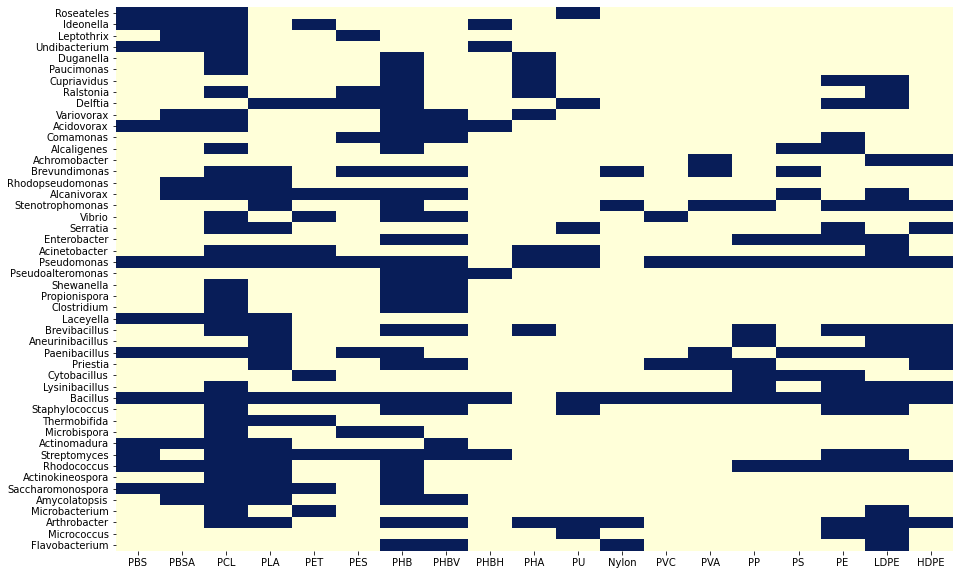

In [61]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_org_bac_heat,ax=ax,cmap="YlGnBu", cbar=False)

## frequency heatmap

In [62]:
mat=np.zeros([48,19])

In [63]:
for i in df_org_bac.loc[df_org_bac['genus_organism'].isin(l)].loc[df_org_bac['Plastic_abb.'].isin(plastic_selected_order)].groupby('genus_organism'):
    #print(l.index(i[0]))
    for j in i[1]['Plastic_abb.'].values:
        mat[l.index(i[0])][plastic_selected_order.index(j)]+=1

In [64]:
mat_normal=np.zeros([48,19])

In [65]:
for i in range(19):
    mat_normal[:,i]=mat[:,i]/sum(mat[:,i])

In [66]:
df_org_bac_heat=pd.DataFrame(mat_normal,columns=plastic_selected_order)

In [67]:
df_org_bac_heat.index=l

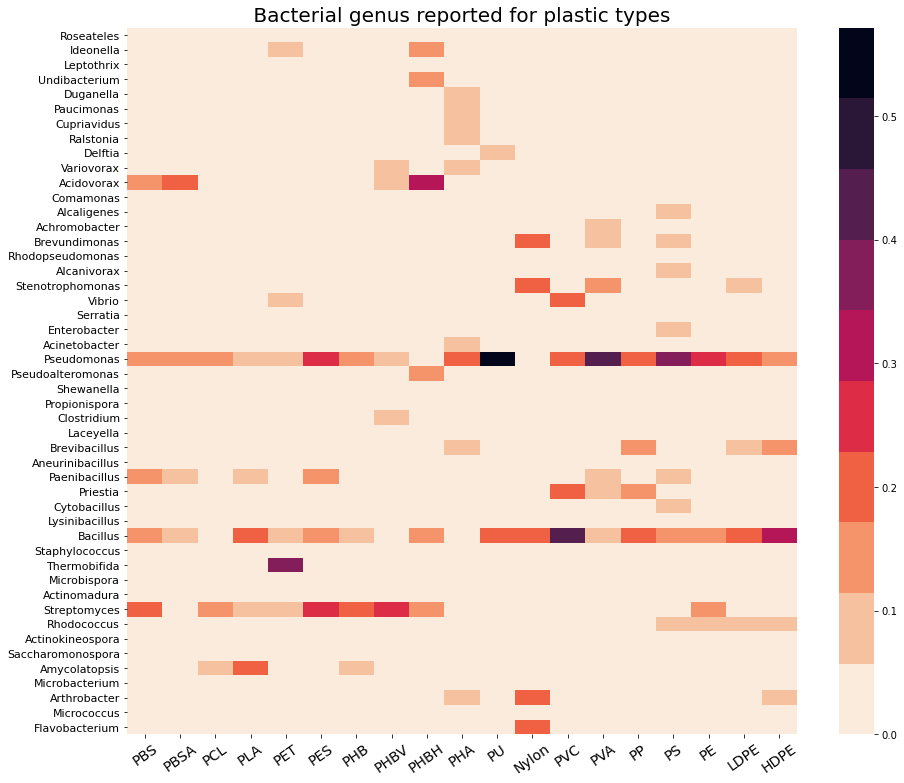

In [80]:
fig, ax = plt.subplots(figsize=(15, 13))
cmap = plt.cm.get_cmap("rocket_r",10)
sns.heatmap(df_org_bac_heat,ax=ax,cmap=cmap)
ax.set_title(' Bacterial genus reported for plastic types ',fontsize=20)
plt.xticks(fontsize=14,rotation=35)
plt.yticks(fontsize=11)
plt.savefig("bacterial_heatmap.tiff")
plt.show()

## Fungus genus heatmap

In [81]:
count=[]
for taxa in df_org['taxa']:
    #print(taxa)
    kingdom=[]
    try:
        for key,value in ncbi.get_rank(ncbi.get_lineage(taxa)).items():
            if value=='superkingdom':
                kingdom.append(key)
    except:
        print(taxa)
    kingdom.append(taxa)
    count.append(kingdom)

In [92]:
len(set([i[0] for i in count]))

2

In [93]:
bac_taxa=list(set([i[1] for i in count if i[0]==2]))

In [94]:
len(bac_taxa)

307

In [95]:
len(df_org_bac.genus.unique())

125

In [96]:
len(set(bac_taxa))

307

In [97]:
df_org.loc[~(df_org['taxa'].isin(bac_taxa))].shape

(508, 4)

In [98]:
df_org_fug=df_org.loc[~(df_org['taxa'].isin(bac_taxa))]

In [99]:
count=[]
for taxa in df_org_fug['taxa']:
    #print(taxa)
    kingdom=[]
    try:
        for key,value in ncbi.get_rank(ncbi.get_lineage(taxa)).items():
            if value=='kingdom':
                kingdom.append(key)
    except:
        print(taxa)
    kingdom.append(taxa)
    count.append(kingdom)

In [100]:
len([i for i in count if len(i)==2])

508

In [101]:
len(count)

508

In [102]:
len(set([i[1] for i in count]))

172

In [103]:
len(set([i[0] for i in count]))

3

/home/sunny/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

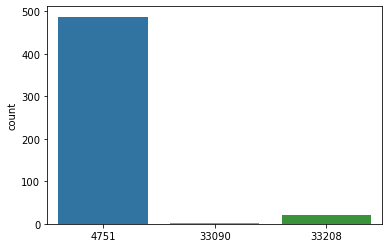

In [104]:
sns.countplot([i[0] for i in count])

In [105]:
collections.Counter([i[0] for i in count])

Counter({4751: 487, 33090: 1, 33208: 20})

In [106]:
len(set([i[1] for i in count if i[0]==4751]))

166

In [107]:
fungal_genus=list(set([i[1] for i in count if i[0]==4751]))

In [108]:
df_org_fung=df_org.loc[df_org['taxa'].isin(fungal_genus)]

In [109]:
fcount=[]
ftaxa=[]
for taxa in df_org_fung['taxa']:
    #print(taxa)
    genus=[]
    try:
        for key,value in ncbi.get_rank(ncbi.get_lineage(taxa)).items():
            if value=='genus':
                genus.append(key)
                ftaxa.append(taxa)
    except:
        print(taxa)
    genus.append(taxa)
    fcount.append(genus)

In [110]:
fungal_genus=[i[0] for i in fcount]

In [111]:
df_org_fung['genus']=fungal_genus

/home/sunny/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [112]:
genus_organism=[]
for index, row in df_org_fung.iterrows():
    genus_organism.append(ncbi.get_taxid_translator([row['genus']])[row['genus']])

In [113]:
len(set(genus_organism))

79

In [114]:
for i in list(set(genus_organism)):
    print(i)

Trametes
Marquandomyces
Clonostachys
Pyrenochaetopsis
Yarrowia
Rhodotorula
Parengyodontium
Bipolaris
Lulwoana
Lentinus
Mycosphaerella
Meyerozyma
Knufia
Cephalosporium
Candolleomyces
Agaricus
Alternaria
Aureobasidium
Thermomyces
Pestalotiopsis
Bjerkandera
Pseudozyma
Cordyceps
Fusarium
Thyrostroma
Fomitopsis
Rhizopus
Diaporthe
Akanthomyces
Talaromyces
Myrothecium
Thermoascus
Monascus
Colletotrichum
Malbranchea
Leptosphaeria
Moesziomyces
Cladosporium
Verticillium
Gibellulopsis
Plectosphaerella
Arthrographis
Chaetomium
Rasamsonia
Papiliotrema
Pleurotus
Purpureocillium
Chrysosporium
Nia
Stagonosporopsis
Leptobacillium
Penicillium
Gloeophyllum
Cunninghamella
Absidia
Actinomucor
Mortierella
Phanerodontia
Lichtheimia
Paecilomyces
Cryptococcus
Acremonium
Debaryomyces
Sarocladium
Metarhizium
Curvularia
Trichoderma
Monocillium
Mucor
Marasmius
Diutina
Phoma
Pseudogymnoascus
Humicola
Flammulina
Asteromyces
Aspergillus
Entomortierella
Paraphoma


In [115]:
count=0
for i in df_org_fung.groupby('genus'):
    if len(set(i[1]['Plastic_abb.'].values))>2:
        count+=1

In [116]:
count

28

In [117]:
df_org_fung.shape

(487, 5)

In [118]:
len(genus_organism)

487

In [119]:
df_org_fung['genus_organism']=genus_organism

/home/sunny/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [120]:
count=0
for i in df_org_fung.groupby('genus_organism'):
    if len(set(i[1]['Plastic_abb.'].values))>2:
        count+=1

### Out of 79 genus associated with fungai only 28 are reported for more than 2 plastic types

In [121]:
count=0
for i in df_org_fung.groupby('genus_organism'):
    if len(set(i[1]['Plastic_abb.'].values))>2:
        print(i[0])

Absidia
Acremonium
Actinomucor
Alternaria
Aspergillus
Aureobasidium
Bjerkandera
Chaetomium
Cladosporium
Clonostachys
Cordyceps
Cryptococcus
Curvularia
Fusarium
Meyerozyma
Moesziomyces
Mortierella
Paecilomyces
Papiliotrema
Penicillium
Phanerodontia
Pleurotus
Purpureocillium
Rhizopus
Talaromyces
Thermoascus
Thermomyces
Trichoderma


In [123]:
! cat ../fungal_genus_selected28_ordered.txt | wc -l

28


In [125]:
f=open('../fungal_genus_selected28_ordered.txt','r')

In [126]:
l=f.readlines()

In [127]:
l=[i.strip() for i in l]

In [128]:
fungal_genus_ordered=l

In [129]:
plastic_selected_order=['PBS','PBSA','PCL','PLA','PET','PES','PHB','PHBV','PHBH','PHA','PU','Nylon','PVC','PVA','PP','PS','PE','LDPE','HDPE']

In [130]:
len(set(plastic_selected_order))

19

In [133]:
fmat=np.zeros([28,19])

In [134]:
df_org_fung.loc[df_org_fung['Plastic_abb.'].isin(plastic_selected)].shape

(432, 6)

In [135]:
for i in df_org_fung.loc[df_org_fung['genus_organism'].isin(l)].loc[df_org_fung['Plastic_abb.'].isin(plastic_selected_order)].groupby('genus_organism'):
    #print(l.index(i[0]))
    for j in i[1]['Plastic_abb.'].values:
        fmat[l.index(i[0])][plastic_selected_order.index(j)]+=1

In [136]:
mat_normal=np.zeros([28,19])

In [137]:
for i in range(19):
    mat_normal[:,i]=fmat[:,i]/sum(fmat[:,i])

/home/sunny/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [138]:
[ sum(fmat[:,i]) for i in range(19)]

[14.0,
 20.0,
 43.0,
 40.0,
 12.0,
 7.0,
 61.0,
 24.0,
 0.0,
 1.0,
 30.0,
 3.0,
 12.0,
 1.0,
 1.0,
 3.0,
 26.0,
 46.0,
 9.0]

In [139]:
df_org_fung1=df_org_fung.loc[df_org_fung['Plastic_abb.'].isin(plastic_selected)]

In [140]:
count=0
for i in df_org_fung1.groupby('genus_organism'):
    if len(set(i[1]['Plastic_abb.'].values))>1:
        count+=1

In [141]:
count

42

In [142]:
count=0
for i in df_org_fung1.groupby('genus_organism'):
    if len(set(i[1]['Plastic_abb.'].values))>1:
        print(i[0])

Absidia
Acremonium
Actinomucor
Alternaria
Aspergillus
Asteromyces
Aureobasidium
Bjerkandera
Cephalosporium
Chaetomium
Cladosporium
Clonostachys
Cordyceps
Cryptococcus
Curvularia
Debaryomyces
Fusarium
Leptobacillium
Marquandomyces
Meyerozyma
Moesziomyces
Mortierella
Mucor
Nia
Paecilomyces
Papiliotrema
Paraphoma
Parengyodontium
Penicillium
Phanerodontia
Pleurotus
Pseudogymnoascus
Purpureocillium
Rhizopus
Rhodotorula
Sarocladium
Talaromyces
Thermoascus
Thermomyces
Trametes
Trichoderma
Yarrowia


## heatmap of 42 fungal with selected plastics

In [143]:
! cat ../fungal_genus_selected42_ordered.txt | wc -l

42


In [144]:
f=open('../fungal_genus_selected42_ordered.txt','r')

In [145]:
l=f.readlines()

In [146]:
l=[i.strip() for i in l]

In [147]:
l[:10]

['Phanerodontia',
 'Papiliotrema',
 'Nia',
 'Moesziomyces',
 'Rhodotorula',
 'Bjerkandera',
 'Trametes',
 'Pleurotus',
 'Cryptococcus',
 'Marquandomyces']

In [148]:
fungal_genus_ordered=l

In [149]:
plastic_selected_order=['PBS','PBSA','PCL','PLA','PET','PES','PHB','PHBV','PHBH','PHA','PU','Nylon','PVC','PVA','PP','PS','PE','LDPE','HDPE']

In [151]:
len(set(plastic_selected_order))

19

In [152]:
mat=np.zeros([42,19])

In [153]:
len(df_org_fung1['Plastic_abb.'].unique())

18

In [154]:
set(plastic_selected_order)-set(collections.Counter(df_org_fung1['Plastic_abb.'].values).keys())

{'PHBH'}

### No fungal genus found to associate with PHBH in filtered conditions

In [156]:
plastic_selected_order=['PBS','PBSA','PCL','PLA','PET','PES','PHB','PHBV','PHA','PU','Nylon','PVC','PVA','PP','PS','PE','LDPE','HDPE']

In [157]:
mat=np.zeros([42,18])

In [158]:
for i in df_org_fung1.loc[df_org_fung1['genus_organism'].isin(l)].groupby('genus_organism'):
    #print(l.index(i[0]))
    for j in i[1]['Plastic_abb.'].values:
        mat[l.index(i[0])][plastic_selected_order.index(j)]+=1

In [159]:
mat_normal=np.zeros([42,18])

In [160]:
for i in range(18):
    mat_normal[:,i]=mat[:,i]/sum(mat[:,i])

In [161]:
df_org_fung_heat=pd.DataFrame(mat_normal,columns=plastic_selected_order)

In [162]:
df_org_fung_heat.index=l

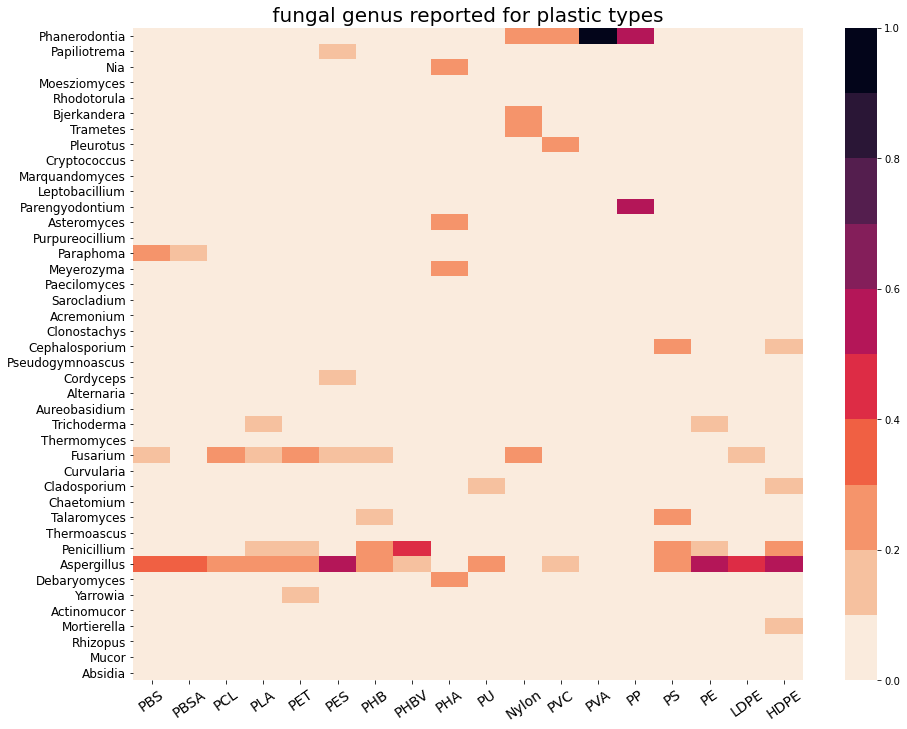

In [169]:
fig, ax = plt.subplots(figsize=(15, 12))
cmap = plt.cm.get_cmap("rocket_r",10)
sns.heatmap(df_org_fung_heat,ax=ax,cmap=cmap)
ax.set_title(' fungal genus reported for plastic types ',fontsize=20)
plt.xticks(fontsize=14,rotation=35)
plt.yticks(fontsize=12)
plt.savefig("fungal_heatmap.eps")
plt.show()